## Installing Sentence transformer from hugging-face for generatig sentance embeddings and text hero for text preprocessing


In [ ]:
!pip install texthero

     |████████████████████████████████| 241 kB 10.2 MB/s 
     |████████████████████████████████| 1.5 MB 53.1 MB/s 
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [ ]:
!pip install -U sentence-transformers
#!pip install faiss

     |████████████████████████████████| 85 kB 3.3 MB/s 
     |████████████████████████████████| 2.5 MB 27.7 MB/s 
     |████████████████████████████████| 1.2 MB 65.0 MB/s 
     |████████████████████████████████| 43 kB 2.1 MB/s 
     |████████████████████████████████| 895 kB 65.9 MB/s 
     |████████████████████████████████| 3.3 MB 33.3 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.0.0-py3-none-any.whl size=126709 sha256=c03a8e18cb94b522cb1b6db83b80aa5d7b8400b80c81acbc0e76615805f7c9ff
  Stored in directory: /root/.cache/pip/wheels/d1/c1/0f/faafd427f705c4b012274ba60d9a91d75830306811e1355293
Successfully built sentence-transformers


## Importing Important Packages 

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import texthero as hero
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Downloading pretrained model for Sentence embedding generation 
SRC:https://huggingface.co/sentence-transformers/paraphrase-xlm-r-multilingual-v1 

In [ ]:
embedding_model=r'''sentence-transformers/paraphrase-xlm-r-multilingual-v1'''#r'''distilbert-base-nli-stsb-mean-tokens'''
embedder = SentenceTransformer(embedding_model)

## Reading the provided Text dataset and Removing all other empty columns from the pandas dataframe (Keeping only text column in data frame)

In [ ]:
file_path=r'''https://github.com/shailesh897/Text-Based-Clustering/blob/506dda5975635b90a9bc26434b5750d6bf14a774/clustering.xlsx?raw=true
'''
data = pd.read_excel(file_path)
data=data['Text'].to_frame()
data.head()

,Text
0,"Moeller's student-run newspaper, The Crusader,..."
1,"In 2008, The Crusader won First Place, the sec..."
2,The Squire is a student literary journal that ...
3,Paul Keels - play-by-play announcer for Ohio S...
4,Joe Uecker - Ohio State Senator (R-66) .


In [ ]:
data.size

46117

## Removing Duplicate values

In [ ]:
data = data.drop_duplicates('Text')
data_backup=data.copy()
data.size

45995

##Preprocessing Of text
Removing URLS, digits, punctuations,Whitespace, Diacritics etc.


In [ ]:
import re
#this function is created for custum cleaning of given data
def custom_clean_text(x):
  x = " ".join(x.split())
  x=re.sub(r"\([^()]*\)", "", x)
  x = re.sub(r"\([^()]*\)", "", x)
  x = re.sub(r"(\*|\?|=)+", "", x) ##removing all *, ? and =
  x = re.sub(r"\b(\w+)( \1\b)+", r"\1", x) ## removing consecutive dupicate words
  x = x.replace("[REF]", "")
  x = x.replace("ref", "")
  x = re.sub(r"([^A-Za-z0-9\s](\s)){2,}", "", x)##remove consecutive punctuations
  return(x.replace("  ", " "))

data['Text']=data['Text'].apply(lambda x: custom_clean_text(x))

In [ ]:
data['Text']=hero.remove_urls(data['Text'])
data['Text']=hero.remove_digits(data['Text'])
data['Text']=hero.remove_punctuation(data['Text'])
data['Text']=hero.remove_diacritics(data['Text'])
data['Text']=hero.remove_whitespace(data['Text'])
data['Text']=hero.lowercase(data['Text'])
data['Text']=hero.remove_stopwords(data['Text'])

In [ ]:
data.head(50)

,Text
0,moeller student run newspaper crusader cons...
1,crusader first place second highest honor ...
2,squire student literary journal features s...
3,paul keels play play announcer ohio state un...
4,joe uecker ohio state senator
5,rico murray undrafted free agent signee cinc...
6,tony hunter professional football player buff...
7,jack norris president co founder vegan outreach
8,archbishop moeller high school established f...
9,moeller high school opened doors september a...


## Converting text to embeddings(786 dimension)

In [ ]:
%%time
corpus=list(data['Text'])
corpus_embeddings = embedder.encode(corpus)

CPU times: user 1min 21s, sys: 1.86 s, total: 1min 23s
Wall time: 1min 29s


In [ ]:
corpus_embeddings.shape

(45995, 768)

In [ ]:
corpus_embeddings

array([[-0.04811046,  0.06845043,  0.10649304, ...,  0.78079677,
         0.58524305,  0.13056839],
       [ 0.19750996,  0.12915568,  0.1880627 , ...,  0.4628159 ,
         0.13623798,  0.12356051],
       [-0.26836342, -0.20974484,  0.13624187, ...,  0.4309319 ,
         0.14487049,  0.23078798],
       ...,
       [-0.11454294, -0.06209112,  0.19817834, ...,  0.39021313,
         0.24565487, -0.12484758],
       [ 0.07047868,  0.11406047,  0.22797379, ...,  0.01902706,
         0.337881  ,  0.05868477],
       [ 0.1220857 ,  0.17883226,  0.3554643 , ...,  0.08159825,
         0.11115288, -0.15135442]], dtype=float32)

## This function could be useful for dimentionality reduction(SVD)

In [ ]:
def reduce_dimension(embedding_df,new_dimension):
  from sklearn.decomposition import TruncatedSVD
  tsvd = TruncatedSVD(n_components=new_dimension)
  tsvd_3d = pd.DataFrame(tsvd.fit_transform(embedding_df))
  return tsvd_3d

## Reducing dimensions of embedding(to 2 dimension for visualisation)
This could lead to significant loss of information but  I am using this just to quickly validate the number of cluster [link text](https://) because using elbow method  on original embeddings will take time (Just to get idea about the range in which desired number of cluster will lie)

In [ ]:
%%time
reduced_embeddings=reduce_dimension(corpus_embeddings,2)

CPU times: user 1.48 s, sys: 1.16 s, total: 2.65 s
Wall time: 1.42 s


In [ ]:
reduced_embeddings

,0,1
0,2.627966,0.040282
1,2.881140,0.098351
2,2.206031,-0.177689
3,2.313651,1.398927
4,1.774076,1.648826
...,...,...
45990,2.833938,-1.491893
45991,2.207468,-1.161005
45992,1.980102,0.392035
45993,3.615795,0.486499


## Using Elbow method for optimal numbers of cluster for the given dataset
 
 IMP: "**I am using  reduced embeddings**"
 It can clearly be seen that some where around cluster number 3 -  6,Decrease rate for WSS got slower.  It gives us the sense that optimal number of cluster should be near to this range.

## Plotting the ***WSS***(Within-Cluster-Sum of Squared Errors) vs K graph for defining elbow.

In [ ]:
sse = []
k_rng = range(1,20)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(reduced_embeddings)
    sse.append(km.inertia_)
    print("WSS: ",km.inertia_,"  Clusters: ",k)

WSS:  53573.1   Clusters:  1
WSS:  26171.075099529095   Clusters:  2
WSS:  19073.910242893555   Clusters:  3
WSS:  14941.4326522985   Clusters:  4
WSS:  12440.483713187483   Clusters:  5
WSS:  10373.10221559438   Clusters:  6
WSS:  9186.356634472375   Clusters:  7
WSS:  8155.867238621538   Clusters:  8
WSS:  7367.117186961623   Clusters:  9
WSS:  6695.411896609793   Clusters:  10
WSS:  6213.5460845495445   Clusters:  11
WSS:  5699.673153998176   Clusters:  12
WSS:  5338.335286790741   Clusters:  13
WSS:  4990.232107318882   Clusters:  14
WSS:  4693.409006929862   Clusters:  15
WSS:  4425.324003645623   Clusters:  16
WSS:  4161.402682079565   Clusters:  17
WSS:  3948.207277259753   Clusters:  18
WSS:  3756.575088535838   Clusters:  19


## Number of clusters =4 (seems right choice)

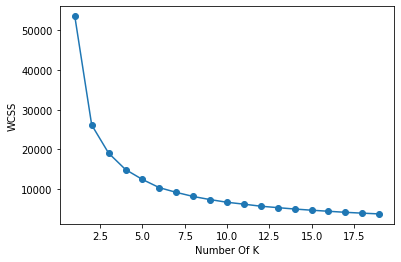

In [ ]:
plt.xlabel('Number Of K')
plt.ylabel('WCSS')
plt.plot(k_rng,sse)
plt.scatter(k_rng,sse)#x="salary", y="school

## Validating number of cluster using **Silhouette Score**

SRC: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In the plot We see there is more negative observation with 4 clusters than 3 cluters

For n_clusters = 2 The average silhouette_score is : 0.42611265
For n_clusters = 3 The average silhouette_score is : 0.34310767
For n_clusters = 4 The average silhouette_score is : 0.34925017
For n_clusters = 5 The average silhouette_score is : 0.32676005
For n_clusters = 6 The average silhouette_score is : 0.3324756


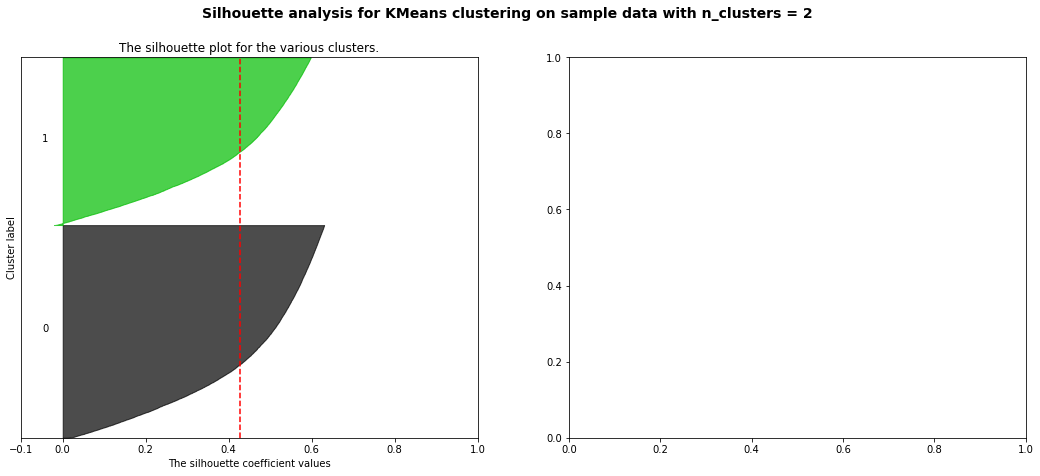

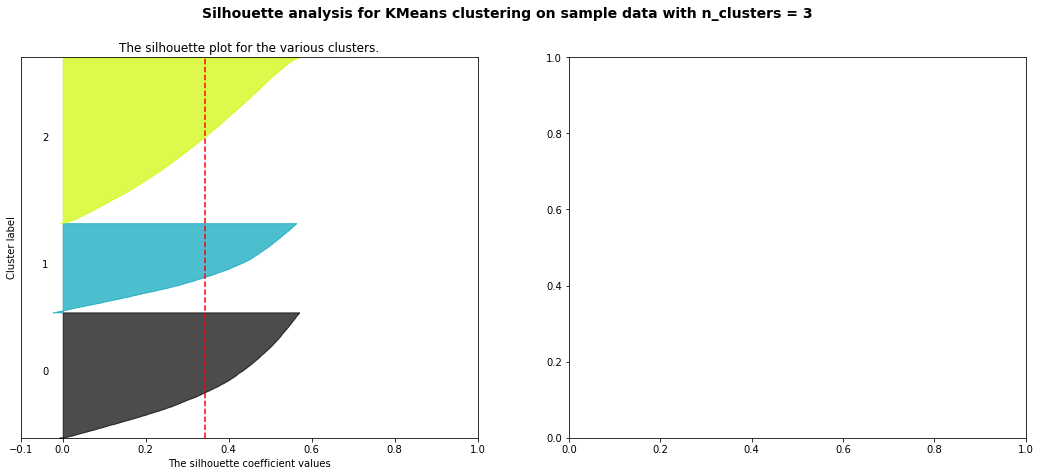

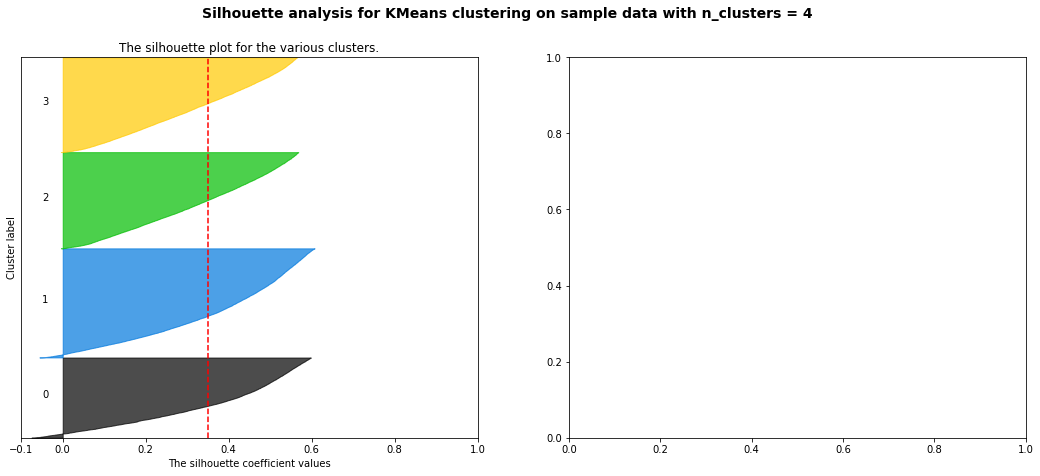

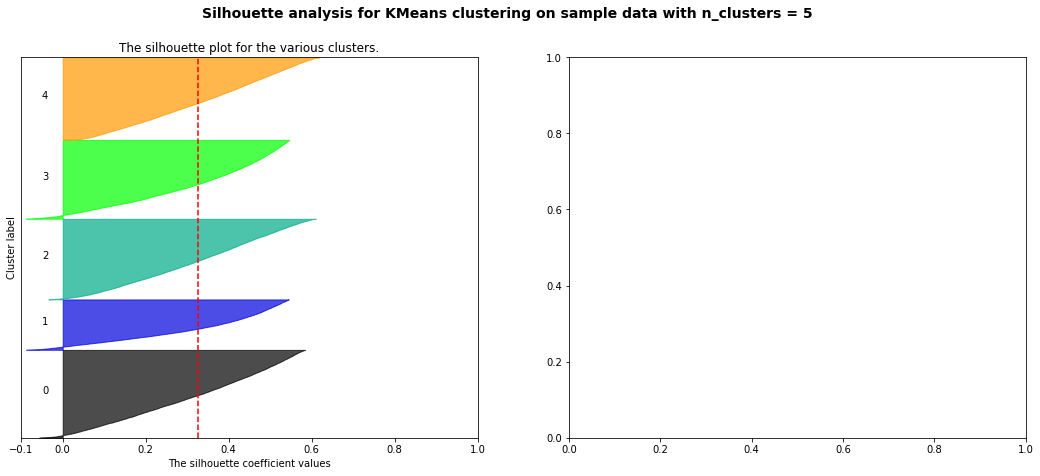

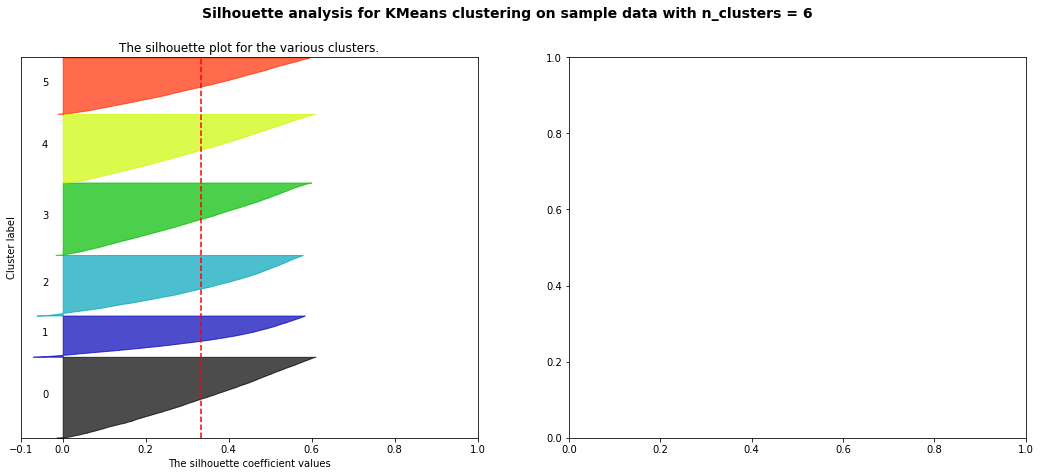

In [ ]:
#Runs for 8 Min on GPU
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

X=reduced_embeddings
range_n_clusters=range(2,7)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [ ]:
import sklearn.metrics as metrics

for i in range(2,30):
    labels=KMeans(n_clusters=i,init="k-means++",random_state=200).fit(reduced_embeddings).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(reduced_embeddings,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.41913593
Silhouette score for k(clusters) = 3 is 0.33843243
Silhouette score for k(clusters) = 4 is 0.34121722
Silhouette score for k(clusters) = 5 is 0.3186309
Silhouette score for k(clusters) = 6 is 0.32524502
Silhouette score for k(clusters) = 7 is 0.30967927
Silhouette score for k(clusters) = 8 is 0.3069953
Silhouette score for k(clusters) = 9 is 0.332445
Silhouette score for k(clusters) = 10 is 0.32023457
Silhouette score for k(clusters) = 11 is 0.32096002
Silhouette score for k(clusters) = 12 is 0.32326162
Silhouette score for k(clusters) = 13 is 0.3115328
Silhouette score for k(clusters) = 14 is 0.30140096
Silhouette score for k(clusters) = 15 is 0.30613932
Silhouette score for k(clusters) = 16 is 0.2964362
Silhouette score for k(clusters) = 17 is 0.29834375
Silhouette score for k(clusters) = 18 is 0.29870206
Silhouette score for k(clusters) = 19 is 0.3065719
Silhouette score for k(clusters) = 20 is 0.30048898
Silhouette score for k(clus

## Optimal number of cluster for the given dataset is **4**

In [ ]:
NUM_OF_CLUSTERS=4

## Training the ***K Mean Algorithm*** with original sentence embeddings

In [ ]:
%%time
from sklearn.cluster import KMeans

num_clusters = NUM_OF_CLUSTERS
# Define kmeans model
clustering_model = KMeans(n_clusters=num_clusters)

# Fitting the embedding with kmeans clustering.
clustering_model.fit(corpus_embeddings)

# Get the cluster id assigned to each sentence.
cluster_assignment = clustering_model.labels_

CPU times: user 58.9 s, sys: 10.7 s, total: 1min 9s
Wall time: 59.6 s


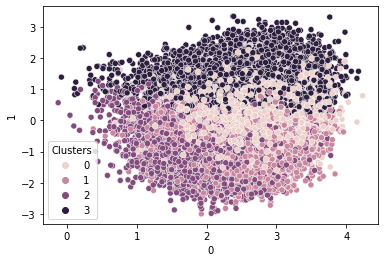

In [ ]:
df_em=pd.DataFrame(reduced_embeddings)
df_em['Clusters']=clustering_model.labels_



import seaborn as sns
sns.scatterplot(data=df_em,x=df_em[0], y=df_em[1],hue='Clusters')

In [ ]:
print(cluster_assignment)

[1 1 2 ... 0 0 0]


In [ ]:
data_Kmeans=data_backup.copy(deep=True)
data_Kmeans['cluster']=clustering_model.labels_
data_Kmeans.head(20)

,Text,cluster
0,"Moeller's student-run newspaper, The Crusader,...",1
1,"In 2008, The Crusader won First Place, the sec...",1
2,The Squire is a student literary journal that ...,2
3,Paul Keels - play-by-play announcer for Ohio S...,3
4,Joe Uecker - Ohio State Senator (R-66) .,3
5,Rico Murray - Undrafted free agent signee by t...,3
6,Tony Hunter - professional football player for...,3
7,Jack Norris - President and co-founder of Vega...,1
8,Archbishop Moeller High School was established...,3
9,Moeller High School opened its doors in Septem...,3


In [ ]:
data_Kmeans.tail(20)

,Text,cluster
46097,Larger musical performances are usually held a...,2
46098,"Vancouver has a vibrant nightlife scene, wheth...",0
46099,Archaeological records indicate the presence o...,0
46100,Europeans became acquainted with the area of t...,0
46101,The explorer and North West Company trader Sim...,0
46102,"The Fraser Gold Rush of 1858 brought over 25,0...",0
46103,The settlement which came to be called Gastown...,3
46104,The City of Vancouver was incorporated on 6 Ap...,0
46105,Vancouver merchants outfitted prospectors boun...,0
46106,The economy of early Vancouver was dominated b...,0


## Saving The labeled dataset To excel sheet(CSV)

In [ ]:
file_name="Labeled Data(KMean).csv"
data_Kmeans.to_csv(file_name)

In [ ]:
'''
%%time
from sklearn.cluster import AgglomerativeClustering

num_clusters = NUM_OF_CLUSTERS

A_clustering_model = AgglomerativeClustering(n_clusters=num_clusters)


# Fitting the embedding with kmeans clustering.
A_clustering_model.fit(reduced_embeddings)

# Get the cluster id assigned to each sentence.
A_cluster_assignment = A_clustering_model.labels_
'''